**Libraries**

In [ ]:
import nltk
nltk.download('reuters')
nltk.download('punkt')
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from collections import Counter
import random
import math
from itertools import combinations_with_replacement
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

**Preprocessing**

In [ ]:
# List all categories in the Reuters corpus
categories = reuters.categories()
print("Reuters Categories:", categories)

Reuters Categories: ['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [ ]:
# Get file IDs for documents in the 'jobs' category
jobs_file_ids = reuters.fileids('jobs')

In [ ]:
# Merge all documents into a single text
merged_text = ' '.join([reuters.raw(file_id) for file_id in jobs_file_ids])

In [ ]:
text = merged_text
tokens = word_tokenize(text)
print(tokens)
print(f"The number of words:{len(tokens)}")

['GERMAN', 'INDUSTRIAL', 'EMPLOYMENT', 'SEEN', 'STAGNATING', 'The', 'number', 'of', 'workers', 'employed', 'in', 'the', 'West', 'German', 'industrial', 'sector', 'stagnated', 'in', 'the', 'last', 'quarter', 'of', '1986', 'as', 'a', '50,000', 'increase', 'in', 'overall', 'employment', 'benefited', 'only', 'the', 'services', 'branch', ',', 'the', 'DIW', 'economic', 'institute', 'said', '.', 'A', 'DIW', 'report', 'added', 'the', 'general', 'downturn', 'in', 'the', 'economy', 'since', 'last', 'Autumn', 'had', 'had', 'a', 'negative', 'effect', 'on', 'the', 'willingness', 'of', 'firms', 'to', 'take', 'on', 'workers', '.', 'It', 'referred', 'to', 'a', 'marked', 'downturn', 'in', 'the', 'number', 'of', 'workers', 'taken', 'on', 'in', 'the', 'capital', 'goods', 'sector', '.', 'New', 'orders', 'for', 'manufacturing', 'industry', 'goods', 'have', 'mostly', 'fallen', 'or', 'stagnated', 'in', 'recent', 'months', ',', 'but', 'data', 'for', 'February', 'finally', 'showed', 'a', 'reversal', 'of', 'the

In [ ]:
# Getting the vocabularies

vocabs = list(set(tokens))
print(f'Vocabs:{vocabs}')
print(f'The number of vocabs:{len(vocabs)}')

Vocabs:['largely', 'building', 'comprised', 'future', 'service-producing', 'final', '1,142', 'laid', 'stimulates', 'implications', 'timetable', '216,600', 'even', 'decelerate', 'kept', 'boost', 'say', 'stick', 'bringing', 'satisfactory', "''", 'rapid', 'MALAYSIA', 'export-dependent', '210,000', 'workforce', 'improvement', 'competitive', 'wave', 'Sumitomo', '2.98', '530,587', 'self-contained', 'be', 'supply', 'subdued', '-', '7', 'politicians', 'willingness', 'England', 'signal', 'policy', 'pressures', 'Businessmen', 'billion', 'ECUs', 'goods-producing', 'excluding', 'win', 'salary', 'flexibility', 'en', 'represented', 'shipbuilders', '10.9', 'confidence', 'original', 'negative', 'slight', 'car', 'totalling', 'agro-food', 'strength', 'BELOW', 'women', 'Agency', 'upturn', 'services', 'moment', 'overseas', 'ordinary', 'estimate', 'July', 'oil-importing', 'running', 'Finnish', 'yesterday', 'Benderly', 'Credit', 'does', 'slowdown', 'DANISH', 'encourage', 'CNPF', 'place', 'personal', 'for', 

In [ ]:
# Appending the <UNK> word in the vocabs
vocabs.append('<UNK>')
print(f'Vocabs:{vocabs}')
print(f'The number of vocabs:{len(vocabs)}')

Vocabs:['largely', 'building', 'comprised', 'future', 'service-producing', 'final', '1,142', 'laid', 'stimulates', 'implications', 'timetable', '216,600', 'even', 'decelerate', 'kept', 'boost', 'say', 'stick', 'bringing', 'satisfactory', "''", 'rapid', 'MALAYSIA', 'export-dependent', '210,000', 'workforce', 'improvement', 'competitive', 'wave', 'Sumitomo', '2.98', '530,587', 'self-contained', 'be', 'supply', 'subdued', '-', '7', 'politicians', 'willingness', 'England', 'signal', 'policy', 'pressures', 'Businessmen', 'billion', 'ECUs', 'goods-producing', 'excluding', 'win', 'salary', 'flexibility', 'en', 'represented', 'shipbuilders', '10.9', 'confidence', 'original', 'negative', 'slight', 'car', 'totalling', 'agro-food', 'strength', 'BELOW', 'women', 'Agency', 'upturn', 'services', 'moment', 'overseas', 'ordinary', 'estimate', 'July', 'oil-importing', 'running', 'Finnish', 'yesterday', 'Benderly', 'Credit', 'does', 'slowdown', 'DANISH', 'encourage', 'CNPF', 'place', 'personal', 'for', 

In [ ]:
# Assigning words with associated number

word2index = {w:i for i,w in enumerate(vocabs)}
print(f'The number of words:{len(word2index)}')

The number of words:2411


In [ ]:
#Creating index to word
index2word = {v:k for k, v in word2index.items()}
print(f'The number of words:{len(index2word)}')

The number of words:2411


**Word2Vec**

1. Defining the random batch function

In [ ]:
def random_batch(batch_size, word_sequence):
    skip_grams = []
    for i in range(2, len(tokens) - 2):
        target = word2index[tokens[i]]
        context = [word2index[tokens[i - 2]], word2index[tokens[i - 1]], word2index[tokens[i + 1]], word2index[tokens[i + 2]]]
        for w in context:
            skip_grams.append([target, w])

    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)

    for i in random_index:
        random_inputs.append([skip_grams[i][0]])
        random_labels.append([skip_grams[i][1]])

    return np.array(random_inputs), np.array(random_labels)

2. Checking the function

In [ ]:
batch_size = 2
random_inputs, random_labels = random_batch(batch_size, tokens)

In [ ]:
random_inputs

array([[1976],
       [1741]])

In [ ]:
random_labels

array([[1801],
       [1803]])

3. Defining the model

In [ ]:
class Skipgram(nn.Module):

    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)

    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        all_embeds    = self.embedding_u(all_vocabs) #   [batch_size, voc_size, emb_size]

        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, voc_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, voc_size, 1] = [batch_size, voc_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)

        return nll # negative log likelihood

4. Training

In [ ]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
voc_size = len(vocabs)
model = Skipgram(voc_size, embedding_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#use for the normalized term in the probability calculation
all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, len(vocabs))  # [batch_size, voc_size]
all_vocabs.shape

torch.Size([2, 2411])

In [ ]:
import time

# Training
num_epochs = 10
for epoch in range(num_epochs):

    start = time.time()

    input_batch, target_batch = random_batch(batch_size, tokens)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)

    loss.backward()
    optimizer.step()

    end = time.time()

    epoch_mins, epoch_secs = epoch_time(start, end)

    print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1 | cost: 9.545076 | time: 0m 0s
Epoch: 2 | cost: 8.742210 | time: 0m 0s
Epoch: 3 | cost: 7.039425 | time: 0m 0s
Epoch: 4 | cost: 8.748057 | time: 0m 0s
Epoch: 5 | cost: 8.782818 | time: 0m 0s
Epoch: 6 | cost: 8.716835 | time: 0m 0s
Epoch: 7 | cost: 8.507611 | time: 0m 0s
Epoch: 8 | cost: 10.688648 | time: 0m 0s
Epoch: 9 | cost: 8.465143 | time: 0m 0s
Epoch: 10 | cost: 13.255697 | time: 0m 0s


5. Plotting the embedding

In [ ]:
#numericalization
word = vocabs[0]
id = word2index[word]
id_tensor = torch.LongTensor([id])

In [ ]:
#get the embedding by averaging
v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

In [ ]:
#average to get the word embedding
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(-1.6244, grad_fn=<SelectBackward0>)

In [ ]:
#let's write a function to get embedding given a word
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor)
    word_embed = (v_embed + u_embed) / 2
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

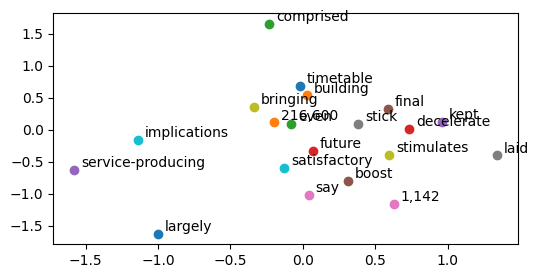

In [ ]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

**Negative Sampling**

1. Unigram Distribution

In [ ]:
word_count = Counter(word_tokenize(text))
num_total_words = sum([c for w, c in word_count.items()])

In [ ]:
unigram_table = []
Z = 0.001
for vo in vocabs:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))
Counter(unigram_table)

Counter({'building': 1,
         'future': 1,
         'laid': 1,
         '216,600': 1,
         'boost': 4,
         'say': 2,
         'bringing': 1,
         "''": 17,
         'export-dependent': 1,
         'workforce': 9,
         'improvement': 4,
         'competitive': 1,
         'Sumitomo': 1,
         '2.98': 1,
         'be': 13,
         'supply': 1,
         '-': 5,
         '7': 1,
         'England': 1,
         'signal': 1,
         'policy': 4,
         'billion': 12,
         'ECUs': 1,
         'goods-producing': 1,
         'en': 1,
         '10.9': 2,
         'confidence': 3,
         'negative': 2,
         'slight': 2,
         'agro-food': 1,
         'strength': 2,
         'women': 1,
         'Agency': 2,
         'upturn': 1,
         'services': 2,
         'overseas': 1,
         'ordinary': 1,
         'estimate': 2,
         'July': 2,
         'running': 1,
         'yesterday': 1,
         'Credit': 1,
         'does': 2,
         'slowdown': 1,
  

2. Negative Sampling

In [ ]:
def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    return torch.cat(neg_samples)

3. Testing

In [ ]:
input_batch  = torch.Tensor(random_inputs)
target_batch = torch.LongTensor(random_labels)

In [ ]:
input_batch.shape, target_batch.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [ ]:
num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)

tensor([[ 185, 1760, 1604],
        [1086,  869, 1606]])

3. Define the model

In [ ]:
class SkipgramNegSampling(nn.Module):

    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()

    def forward(self, center_words, target_words, negative_words):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_u(negative_words) # [batch_size, num_neg, emb_size]

        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        negative_score = neg_embeds.bmm(center_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]

        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)

        return -torch.mean(loss)

    def prediction(self, inputs):
        embeds = self.embedding_v(inputs)

        return embeds

4. Training

In [ ]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
voc_size = len(vocabs)
model_neg          = SkipgramNegSampling(voc_size, embedding_size)
num_neg        = 10 # num of negative sampling

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training
num_epochs = 10
for epoch in range(num_epochs):

    start = time.time()

    input_batch, target_batch = random_batch(batch_size, tokens)

    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)

    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)

    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)

    optimizer.zero_grad()

    loss = model_neg(input_batch, target_batch, negs_batch)

    end = time.time()

    epoch_mins, epoch_secs = epoch_time(start, end)

    loss.backward()
    optimizer.step()

    # if (epoch + 1) % 1000 == 0:
    print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1 | cost: 9.645765 | time: 0m 0s
Epoch: 2 | cost: 11.308710 | time: 0m 0s
Epoch: 3 | cost: 8.402664 | time: 0m 0s
Epoch: 4 | cost: 8.572196 | time: 0m 0s
Epoch: 5 | cost: 9.271598 | time: 0m 0s
Epoch: 6 | cost: 10.918726 | time: 0m 0s
Epoch: 7 | cost: 10.592072 | time: 0m 0s
Epoch: 8 | cost: 10.141400 | time: 0m 0s
Epoch: 9 | cost: 10.675363 | time: 0m 0s
Epoch: 10 | cost: 11.028366 | time: 0m 0s


5. Plotting the embedding

In [ ]:
#numericalization
word = vocabs[0]
id = word2index[word]
id_tensor = torch.LongTensor([id])

In [ ]:
#get the embedding by averaging
v_embed = model_neg.embedding_v(id_tensor)
u_embed = model_neg.embedding_u(id_tensor)

In [ ]:
#average to get the word embedding
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(-0.8167, grad_fn=<SelectBackward0>)

In [ ]:
#let's write a function to get embedding given a word
def get_embed_neg(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model_neg.embedding_v(id_tensor)
    u_embed = model_neg.embedding_u(id_tensor)
    word_embed = (v_embed + u_embed) / 2
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

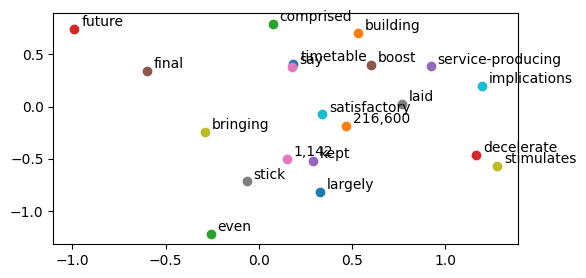

In [ ]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed_neg(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

**GLOVE**

1. Defining the random batch

In [ ]:
def random_batch_glove(batch_size, word_sequence, skip_grams, X_ik, weighting_dic):

    #convert to id since our skip_grams is word, not yet id
    skip_grams_id = [(word2index[skip_gram[0]], word2index[skip_gram[1]]) for skip_gram in skip_grams]

    random_inputs = []
    random_labels = []
    random_coocs  = []
    random_weightings = []
    random_index = np.random.choice(range(len(skip_grams_id)), batch_size, replace=False) #randomly pick without replacement

    for i in random_index:
        random_inputs.append([skip_grams_id[i][0]])  # target, e.g., 2
        random_labels.append([skip_grams_id[i][1]])  # context word, e.g., 3

        #get cooc
        pair = skip_grams[i]
        try:
            cooc = X_ik[pair]
        except:
            cooc = 1
        random_coocs.append([math.log(cooc)])

        #get weighting
        weighting = weighting_dic[pair]
        random_weightings.append([weighting])

    return np.array(random_inputs), np.array(random_labels), np.array(random_coocs), np.array(random_weightings)

2. Build Co-occurence Matrix X

In [ ]:
X_i = Counter(tokens) # X_i

In [ ]:
skip_grams = []
for i in range(2, len(tokens) - 2):
    target = tokens[i]
    context = [tokens[i - 2],tokens[i - 1], tokens[i + 1],tokens[i + 2]]
    for w in context:
        skip_grams.append((target, w))

In [ ]:
X_ik_skipgram = Counter(skip_grams)

In [ ]:
#simply a normalized function...don't worry too much
def weighting(w_i, w_j, X_ik):

    #check whether the co-occurrences exist between these two words
    try:
        x_ij = X_ik[(w_i, w_j)]
    except:
        x_ij = 1  #if does not exist, set it to 1

    x_max = 100 #100 # fixed in paper  #cannot exceed 100 counts
    alpha = 0.75

    #if co-occurrence does not exceed 100, scale it based on some alpha
    if x_ij < x_max:
        result = (x_ij/x_max)**alpha  #scale it
    else:
        result = 1  #if is greater than max, set it to 1 maximum

    return result

In [ ]:
X_ik = {}  #for keeping the co-occurences
weighting_dic = {} #scaling the percentage of sampling

for bigram in combinations_with_replacement(vocabs, 2):
    if X_ik_skipgram.get(bigram) is not None:  #matches
        co_occer = X_ik_skipgram[bigram]  #get the count from what we already counted
        X_ik[bigram] = co_occer + 1 # + 1 for stability issue
        X_ik[(bigram[1],bigram[0])] = co_occer+1   #count also for the opposite
    else:
        pass

    weighting_dic[bigram] = weighting(bigram[0], bigram[1], X_ik)
    weighting_dic[(bigram[1], bigram[0])] = weighting(bigram[1], bigram[0], X_ik)

print(f"{X_ik=}")
print(f"{weighting_dic=}")

X_ik={('largely', 'sector'): 2, ('sector', 'largely'): 2, ('largely', 'due'): 2, ('due', 'largely'): 2, ('largely', 'to'): 2, ('to', 'largely'): 2, ('largely', 'is'): 2, ('is', 'largely'): 2, ('building', 'which'): 2, ('which', 'building'): 2, ('building', ','): 2, (',', 'building'): 2, ('building', 'societies'): 2, ('societies', 'building'): 2, ('building', 'in'): 2, ('in', 'building'): 2, ('building', 'industry'): 2, ('industry', 'building'): 2, ('building', '.'): 2, ('.', 'building'): 2, ('building', 'the'): 2, ('the', 'building'): 2, ('building', 'said'): 2, ('said', 'building'): 2, ('comprised', 'services'): 2, ('services', 'comprised'): 2, ('comprised', 'employment'): 2, ('employment', 'comprised'): 2, ('comprised', 'greater'): 2, ('greater', 'comprised'): 2, ('comprised', 'the'): 2, ('the', 'comprised'): 2, ('future', 'Dutch'): 2, ('Dutch', 'future'): 2, ('future', 'it'): 2, ('it', 'future'): 2, ('future', 'in'): 3, ('in', 'future'): 3, ('future', '.'): 2, ('.', 'future'): 2, ('

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3. Testing

In [ ]:
#testing the method
batch_size = 2 # mini-batch size
input_batch, target_batch, cooc_batch, weighting_batch = random_batch_glove(batch_size, tokens, skip_grams, X_ik, weighting_dic)

print("Input: ", input_batch)
print("Target: ", target_batch)
print("Cooc: ", cooc_batch)
print("Weighting: ", weighting_batch)

Input:  [[1803]
 [1156]]
Target:  [[1558]
 [1966]]
Cooc:  [[1.38629436]
 [0.69314718]]
Weighting:  [[0.08944272]
 [0.05318296]]


4. Defining the model

In [ ]:
class GloVe(nn.Module):

    def __init__(self, vocab_size,embed_size):
        super(GloVe,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, embed_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, embed_size) # out embedding

        self.v_bias = nn.Embedding(vocab_size, 1)
        self.u_bias = nn.Embedding(vocab_size, 1)

    def forward(self, center_words, target_words, coocs, weighting):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]

        center_bias = self.v_bias(center_words).squeeze(1)
        target_bias = self.u_bias(target_words).squeeze(1)

        inner_product = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        #note that coocs already got log
        loss = weighting*torch.pow(inner_product +center_bias + target_bias - coocs, 2)

        return torch.sum(loss)

5. Training

In [ ]:
batch_size     = 10 # mini-batch size
embedding_size = 2 #so we can later plot
voc_size = len(vocabs)
model_glove          = GloVe(voc_size, embedding_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training
num_epochs = 10
for epoch in range(num_epochs):

    start = time.time()

    input_batch, target_batch, cooc_batch, weighting_batch = random_batch_glove(batch_size, tokens, skip_grams, X_ik, weighting_dic)
    input_batch  = torch.LongTensor(input_batch)         #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch)        #[batch_size, 1]
    cooc_batch   = torch.FloatTensor(cooc_batch)         #[batch_size, 1]
    weighting_batch = torch.FloatTensor(weighting_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model_glove(input_batch, target_batch, cooc_batch, weighting_batch)

    loss.backward()
    optimizer.step()

    end = time.time()

    epoch_mins, epoch_secs = epoch_time(start, end)

    # if (epoch + 1) % 1000 == 0:
    print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1 | cost: 7.282240 | time: 0m 0s
Epoch: 2 | cost: 17.476910 | time: 0m 0s
Epoch: 3 | cost: 6.917199 | time: 0m 0s
Epoch: 4 | cost: 32.799435 | time: 0m 0s
Epoch: 5 | cost: 68.087143 | time: 0m 0s
Epoch: 6 | cost: 5.634784 | time: 0m 0s
Epoch: 7 | cost: 13.297933 | time: 0m 0s
Epoch: 8 | cost: 8.388350 | time: 0m 0s
Epoch: 9 | cost: 9.828851 | time: 0m 0s
Epoch: 10 | cost: 2.777711 | time: 0m 0s


6. Plotting the embedding

In [ ]:
#get the embedding by averaging
v_embed = model_glove.embedding_v(id_tensor)
u_embed = model_glove.embedding_u(id_tensor)

v_embed, u_embed

(tensor([[-2.2872,  0.7971]], grad_fn=<EmbeddingBackward0>),
 tensor([[1.8228, 1.5694]], grad_fn=<EmbeddingBackward0>))

In [ ]:
#average to get the word embedding
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(1.1832, grad_fn=<SelectBackward0>)

In [ ]:
#let's write a function to get embedding given a word
def get_embed_glove(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model_glove.embedding_v(id_tensor)
    u_embed = model_glove.embedding_u(id_tensor)
    word_embed = (v_embed + u_embed) / 2
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

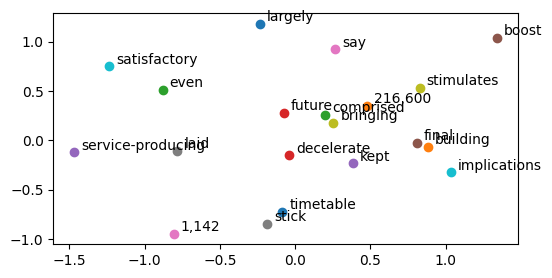

In [ ]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed_glove(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

**GLOVE(Gensim)**

In [ ]:
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

#you have to put this file in some python/gensim directory; just run it and it will inform where to put....
glove_file = datapath('/content/drive/MyDrive/NLP_A1/glove.6B.50d.txt')
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

**Accuracy**

1. Loading the analogy words

In [ ]:
# Open the file in read mode ('r')
file_path = '/content/drive/MyDrive/NLP_A1/word-test.v1.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    # Read the entire content of the file
    file_content = file.read()

2. Tokenizing the words

In [ ]:
def get_embed_vec(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor)
    word_embed = (v_embed + u_embed) / 2
    return word_embed

In [ ]:
# This function slices the data into 2-D list having 4 columns

def load_word_vectors_from_content(file_content):
    word_vectors = []
    word_num = 0

    for sentence in word_tokenize(file_content):
        if word_num == 4:
            word_num = 0
            continue

        tokens = sentence.split(' ')[0]
        if word_num == 0:
            list_word = []

        list_word.append(tokens)
        word_num += 1

        if word_num == 4:
            word_vectors.append(list_word)

    return word_vectors

In [ ]:
Tokens_Analogies = load_word_vectors_from_content(file_content)

In [ ]:
Tokens_Analogies[0]

['Athens', 'Greece', 'Baghdad', 'Iraq']

In [ ]:
# Checking its shape
np.array(Tokens_Analogies).shape

(15640, 4)

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def is_capital_city_ner(word):
    doc = nlp(word)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            return True
    return False

capital_city = []
for word_list in Tokens_Analogies:
    if is_capital_city_ner(word_list[0]):
        capital_city.append(word_list)
capital_city[:5]

[['Athens', 'Greece', 'Baghdad', 'Iraq'],
 ['Greece', 'Bangkok', 'Thailand', 'Athens'],
 ['Beijing', 'China', 'Athens', 'Greece'],
 ['Germany', 'Athens', 'Greece', 'Bern'],
 ['Athens', 'Greece', 'Cairo', 'Egypt']]

In [ ]:
np.asarray(capital_city).shape

(5270, 4)

In [ ]:
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk import pos_tag

# Download the missing resource
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
def is_verb(word):
    # Tokenize the word and get the part-of-speech tags
    tags = pos_tag(word_tokenize(word))

    # Check if any of the tags indicate a verb (VB, VBD, VBG, VBN, VBP, VBZ)
    return any(tag[1].startswith('VB') for tag in tags)

verbs = []
for word_list in Tokens_Analogies:
    if is_verb(word_list[0]):
      verbs.append(word_list)
verbs[:5]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['Belize', 'Algiers', 'Algeria', 'Berlin'],
 ['Belize', 'Ashgabat', 'Turkmenistan', 'Berlin'],
 ['Belize', 'Baku', 'Azerbaijan', 'Berlin'],
 ['Belize', 'Beirut', 'Lebanon', 'Berlin'],
 ['Belize', 'Bern', 'Switzerland', 'Belmopan']]

In [ ]:
np.array(verbs).shape

(1542, 4)

3. Neccessary Functions for Accuracy Calculation

In [ ]:
def get_vec(word,model):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor)
    word_embed = (v_embed + u_embed) / 2
    return word_embed

In [ ]:
def analogy(model, a, b, c):
    try:
        vec_a = get_vec(a, model)
        vec_b = get_vec(b, model)
        vec_c = get_vec(c, model)
        analogy_result = vec_c - vec_a + vec_b
        return analogy_result
    except KeyError:
        return None

In [ ]:
def find_most_similar_word(model, analogy_result, exclude=[]):
    if analogy_result is None:
        return None
    similarities = {}
    for word in vocabs:
        if word not in exclude:
            analogy_result_np = analogy_result.detach().numpy()
            word_vector_np = get_vec(word, model).detach().numpy().T
            similarities[word] = np.dot(analogy_result_np, word_vector_np) / (np.linalg.norm(analogy_result_np) * np.linalg.norm(word_vector_np))

In [ ]:
def calculate_accuracy(model, semantic_analogies):
    correct_predictions = 0

    for anal in semantic_analogies:
        a, b, c, expected_answer = anal

        # Calculate the analogy result using the provided analogy function
        analogy_result = analogy(model, a, b, c)

        # Find the most similar word to the analogy result
        predicted_answer = find_most_similar_word(model, analogy_result, exclude=[a, b, c])

        # Check if the predicted answer matches the expected answer
        if predicted_answer == expected_answer:
            correct_predictions += 1

    semantic_accuracy = correct_predictions / len(semantic_analogies)
    return semantic_accuracy

4. Semantic Accuracy

4.1 Skipgram

In [ ]:
semantic_accuracy = calculate_accuracy(model, capital_city)
print(f"Semantic Accuracy: {semantic_accuracy * 100:.2f}%")

Semantic Accuracy: 0.00%


4.2 Negative Sampling

In [ ]:
semantic_accuracy = calculate_accuracy(model_neg, capital_city)
print(f"Semantic Accuracy: {semantic_accuracy * 100:.2f}%")

Semantic Accuracy: 0.00%


4.3 Glove

In [ ]:
semantic_accuracy = calculate_accuracy(model_glove, capital_city)
print(f"Semantic Accuracy: {semantic_accuracy * 100:.2f}%")

Semantic Accuracy: 0.00%


4.4 Glove (Gensim)

In [ ]:
from scipy.stats import spearmanr

correct_predictions = 0

for analogy in capital_city:
    word1, word2, word3, correct_word = analogy
    if all(word in model.key_to_index for word in [word1, word2, word3, correct_word]):
        predicted_word = model.most_similar(positive=[word2, word3], negative=[word1], topn=1)[0][0]
        if predicted_word == correct_word:
          correct_predictions += 1
semantic_accuracy = correct_predictions / len(capital_city)

print(f"Spearman correlation for semantic accuracy: {semantic_accuracy:.4f}")

Spearman correlation for semantic accuracy: 0.0000


5. Syntactic Accuracy

5.1 Skipgram

In [ ]:
syntactic_accuracy = calculate_accuracy(model, verbs)
print(f"Syntactic Accuracy: {syntactic_accuracy * 100:.2f}%")

Syntactic Accuracy: 0.00%


5.2 Negative Sampling

In [ ]:
syntactic_accuracy = calculate_accuracy(model_neg, verbs)
print(f"Syntactic Accuracy: {syntactic_accuracy * 100:.2f}%")

Syntactic Accuracy: 0.00%


5.3 GLOVE

In [ ]:
syntactic_accuracy = calculate_accuracy(model_glove, verbs)
print(f"Syntactic Accuracy: {syntactic_accuracy * 100:.2f}%")

Syntactic Accuracy: 0.00%


5.4 GLOVE (Gensim)

In [ ]:
correct_predictions = 0

for analogy in verbs:
    word1, word2, word3, correct_word = analogy
    if all(word in model.key_to_index for word in [word1, word2, word3, correct_word]):
        predicted_word = model.most_similar(positive=[word2, word3], negative=[word1], topn=1)[0][0]
        if predicted_word == correct_word:
          correct_predictions += 1
semantic_accuracy = correct_predictions / len(capital_city)

print(f"Spearman correlation for semantic accuracy: {semantic_accuracy:.4f}")

Spearman correlation for semantic accuracy: 0.0577


**Similarity Correlation**

In [ ]:
file_path = '/content/drive/MyDrive/NLP_A1/wordsim_similarity_goldstandard.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    # Read the entire content of the file
    file_similarity = file.read()

In [ ]:
# This function slices the data into 2-D list having 4 columns

def load_word_vectors_from_content_new(file_content):
    word_vectors = []
    word_num = 0

    for sentence in word_tokenize(file_content):
        if word_num == 3:
            word_num = 0
            continue

        tokens = sentence.split(' ')[0]
        if word_num == 0:
            list_word = []

        list_word.append(tokens)
        word_num += 1

        if word_num == 3:
            word_vectors.append(list_word)

    return word_vectors

In [ ]:
similar_words = load_word_vectors_from_content_new(file_similarity)
print(f'similar_words shape:{np.array(similar_words).shape}')

similar_words shape:(152, 3)


In [ ]:
similar_words[:5]

[['tiger', 'cat', '7.35'],
 ['tiger', '10.00', 'plane'],
 ['5.77', 'train', 'car'],
 ['television', 'radio', '6.77'],
 ['radio', '7.42', 'bread']]

In [ ]:
def is_numeric(value):
    try:
        # Try converting to either int or float
        numeric_value = float(value)
        return True
    except ValueError:
        return False

1. Skipgram

In [ ]:
def get_embed_vec_skipgram(word):
    if word not in word2index:
        word = '<UNK>'

    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor)

    # Detach the tensors before any NumPy operation
    v_embed_np = v_embed.detach().numpy()
    u_embed_np = u_embed.detach().numpy()

    word_embed_np = (v_embed_np + u_embed_np) / 2
    word_embed = torch.from_numpy(word_embed_np)

    return word_embed

In [ ]:
# Calculate the similarity correlation
cosine_similarity_list = []
true_val = []
for sent in similar_words:
  vec1 = get_embed_vec_skipgram(sent[0]).reshape(1,-1)
  vec2 = get_embed_vec_skipgram(sent[1])
  for word in sent:
    if(is_numeric(word)):
      true_val.append(word)

  # cosine similarity calculation
  result = cosine_similarity(vec1, vec2)
  cosine_similarity_list.append(result[0][0])

In [ ]:
cosine_similarity_list[:5]

[1.0, 1.0, 1.0, 0.9209839, 1.0]

In [ ]:
true_val[:5]

['7.35', '10.00', '5.77', '6.77', '7.42']

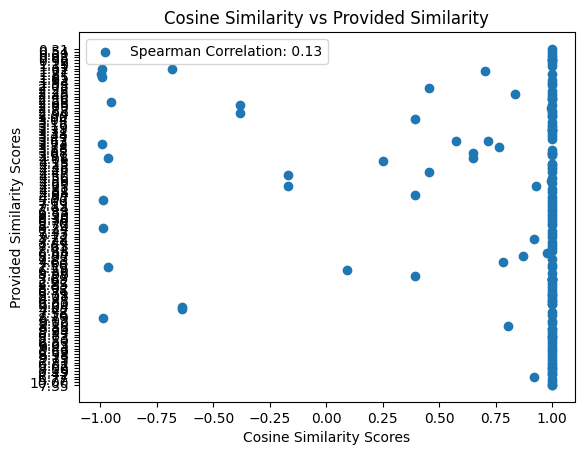

In [ ]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt


# Calculate Spearman correlation coefficient
correlation_coefficient, _ = spearmanr(cosine_similarity_list, true_val)

# Plot the results
plt.scatter(cosine_similarity_list, true_val, label=f'Spearman Correlation: {correlation_coefficient:.2f}')
plt.xlabel('Cosine Similarity Scores')
plt.ylabel('Provided Similarity Scores')
plt.title('Cosine Similarity vs Provided Similarity')
plt.legend()
plt.show()

2. Negative Sampling

In [ ]:
def get_embed_vec_neg(word):
    if word not in word2index:
        word = '<UNK>'

    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model_neg.embedding_v(id_tensor)
    u_embed = model_neg.embedding_u(id_tensor)

    # Detach the tensors before any NumPy operation
    v_embed_np = v_embed.detach().numpy()
    u_embed_np = u_embed.detach().numpy()

    word_embed_np = (v_embed_np + u_embed_np) / 2
    word_embed = torch.from_numpy(word_embed_np)

    return word_embed

In [ ]:
# Calculate the similarity correlation
cosine_similarity_list = []
true_val = []
for sent in similar_words:
  vec1 = get_embed_vec_neg(sent[0]).reshape(1,-1)
  vec2 = get_embed_vec_neg(sent[1])
  for word in sent:
    if(is_numeric(word)):
      true_val.append(word)

  # cosine similarity calculation
  result = cosine_similarity(vec1, vec2)
  cosine_similarity_list.append(result[0][0])

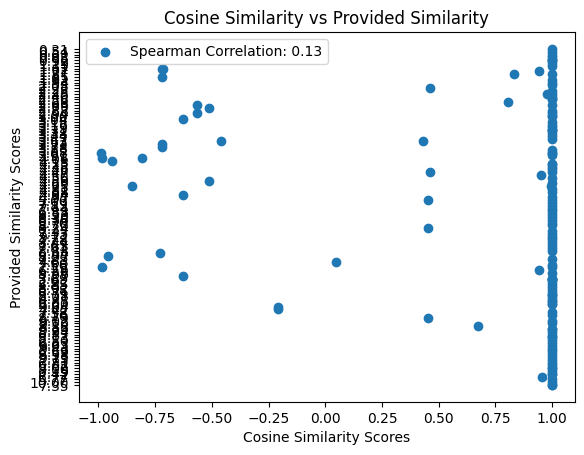

In [ ]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt


# Calculate Spearman correlation coefficient
correlation_coefficient, _ = spearmanr(cosine_similarity_list, true_val)

# Plot the results
plt.scatter(cosine_similarity_list, true_val, label=f'Spearman Correlation: {correlation_coefficient:.2f}')
plt.xlabel('Cosine Similarity Scores')
plt.ylabel('Provided Similarity Scores')
plt.title('Cosine Similarity vs Provided Similarity')
plt.legend()
plt.show()

3. Glove

In [ ]:
def get_embed_vec_glove(word):
    if word not in word2index:
        word = '<UNK>'

    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model_glove.embedding_v(id_tensor)
    u_embed = model_glove.embedding_u(id_tensor)

    # Detach the tensors before any NumPy operation
    v_embed_np = v_embed.detach().numpy()
    u_embed_np = u_embed.detach().numpy()

    word_embed_np = (v_embed_np + u_embed_np) / 2
    word_embed = torch.from_numpy(word_embed_np)

    return word_embed

In [ ]:
# Calculate the similarity correlation
cosine_similarity_list = []
true_val = []
for sent in similar_words:
  vec1 = get_embed_vec_glove(sent[0]).reshape(1,-1)
  vec2 = get_embed_vec_glove(sent[1])
  for word in sent:
    if(is_numeric(word)):
      true_val.append(word)

  # cosine similarity calculation
  result = cosine_similarity(vec1, vec2)
  cosine_similarity_list.append(result[0][0])

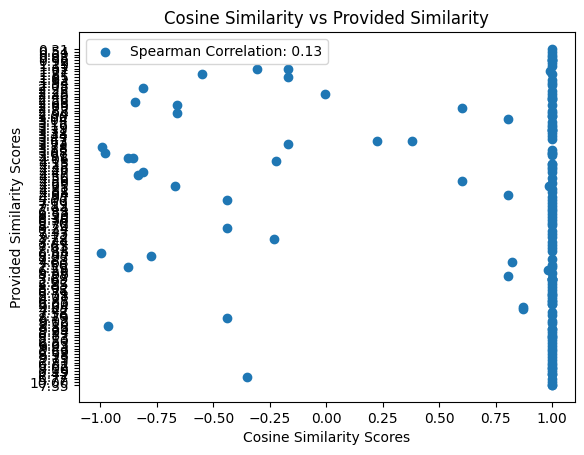

In [ ]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt


# Calculate Spearman correlation coefficient
correlation_coefficient, _ = spearmanr(cosine_similarity_list, true_val)

# Plot the results
plt.scatter(cosine_similarity_list, true_val, label=f'Spearman Correlation: {correlation_coefficient:.2f}')
plt.xlabel('Cosine Similarity Scores')
plt.ylabel('Provided Similarity Scores')
plt.title('Cosine Similarity vs Provided Similarity')
plt.legend()
plt.show()

**Summmary**

In [1]:
import pandas as pd

In [3]:
df = pd.DataFrame({"Model":['Skipgram','Skipgram (NEG)','Glove','Glove (Gensim)'],
                   "Window Size":[2,2,2,2],
                   "Training Loss":[9.443102,10.055617,18.247054,'-'],
                   "Semantic accuracy":[0,0,0,0],
                   "Syntactic accuracy":[0,0,0,0]
                   })

df

,Model,Window Size,Training Loss,Semantic accuracy,Syntactic accuracy
0,Skipgram,2,9.443102,0,0
1,Skipgram (NEG),2,10.055617,0,0
2,Glove,2,18.247054,0,0
3,Glove (Gensim),2,-,0,0


In [6]:
df = pd.DataFrame({"":'Correlation',
                   "Skipgram":[0.13],
                   "Skipgram (NEG)":[0.13],
                   "Glove":[0.13]
                   })
df

,,Skipgram,Skipgram (NEG),Glove
0,Correlation,0.13,0.13,0.13


**Save the model**

In [ ]:
import pickle

Vocabs

In [ ]:
with open('/content/drive/MyDrive/NLP_A1/vocabs.pkl', 'wb') as f:
    pickle.dump(vocabs, f)

word2index

In [ ]:
with open('/content/drive/MyDrive/NLP_A1/word2index.pkl', 'wb') as f:
    pickle.dump(word2index, f)

index2word

In [ ]:
with open('/content/drive/MyDrive/NLP_A1/index2word.pkl', 'wb') as f:
    pickle.dump(index2word, f)

Skipgram

In [ ]:
# Specify the path where you want to save the model
model_path = '/content/drive/MyDrive/NLP_A1/skipgram_model.pth'

In [ ]:
# Save the model
torch.save(model.state_dict(), model_path)

Negative Sampling

In [ ]:
# Specify the path where you want to save the model
model_path = '/content/drive/MyDrive/NLP_A1/negative_sampling.pth'

In [ ]:
# Save the model
torch.save(model_neg.state_dict(), model_path)

GLOVE

In [ ]:
# Specify the path where you want to save the model
model_path = '/content/drive/MyDrive/NLP_A1/.pth'

In [ ]:
# Save the model
torch.save(model_glove.state_dict(), model_path)